# Chapter 12: How Classifiers Work (1 of 2)

Paolo Perrotta, Programming Machine Learning: From Coding to Deep Learning (2020)

The source code for this chapter is split over two notebooks. This is the first one, about the decision boundary and the model of perceptrons.

## Load Data

Execute one of the next three cells, to load one of the three datasets.

In [1]:
import numpy as np

# x1, x2, y = np.loadtxt('linearly_separable.txt', skiprows=1, unpack=True)
# x1, x2, y = np.loadtxt('non_linearly_separable.txt', skiprows=1, unpack=True)
x1, x2, y = np.loadtxt('circles.txt', skiprows=1, unpack=True)

## Perceptron

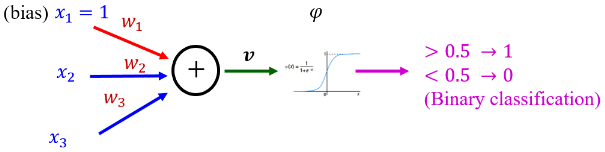

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

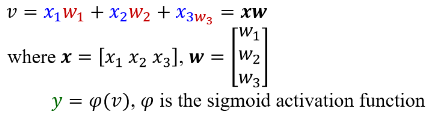

In [3]:
def forward(X, w):
    weighted_sum = np.matmul(X, w)
    return sigmoid(weighted_sum)

def classify(X, w):
    y_hat = forward(X, w)
    labels = np.argmax(y_hat, axis=1)
    return labels.reshape(-1, 1)

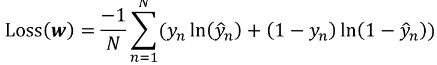

In [4]:
def loss(X, Y, w):
    y_hat = forward(X, w)
    first_term = Y * np.log(y_hat)
    second_term = (1 - Y) * np.log(1 - y_hat)
    return -np.sum(first_term + second_term) / X.shape[0]

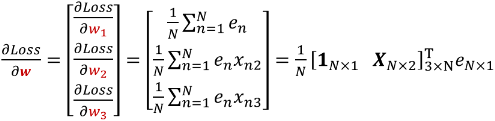

In [5]:
def gradient(X, Y, w):
    return np.matmul(X.T, (forward(X, w) - Y)) / X.shape[0]

In [6]:
def report(iteration, X_train, Y_train, X_test, Y_test, w):
    matches = np.count_nonzero(classify(X_test, w) == Y_test)
    n_test_examples = Y_test.shape[0]
    matches = matches * 100.0 / n_test_examples
    training_loss = loss(X_train, Y_train, w)
    if iteration % 1000 == 0:
        print("%d - Loss: %.20f, %.2f%%" % (iteration, training_loss, matches))

def train(X_train, Y_train, X_test, Y_test, iterations, lr):
    w = np.zeros((X_train.shape[1], Y_train.shape[1]))
    for iteration in range(iterations):        
        report(iteration, X_train, Y_train, X_test, Y_test, w)
        w -= gradient(X_train, Y_train, w) * lr
    report(iteration, X_train, Y_train, X_test, Y_test, w)
    return w

## Train Perceptron

In [7]:
def prepend_bias(X):
    return np.insert(X, 0, 1, axis=1)

def one_hot_encode(Y):
    n_labels = Y.shape[0]
    result = np.zeros((n_labels, 2))
    for i in range(n_labels):
        result[i][Y[i]] = 1
    return result

In [8]:
X_train = X_test = prepend_bias(np.column_stack((x1, x2)))
Y_train_unencoded = Y_test = y.astype(int).reshape(-1, 1)
Y_train = one_hot_encode(Y_train_unencoded)

In [9]:
print(Y_train_unencoded[0:3])
print(Y_train[0:3])

[[1]
 [0]
 [1]]
[[0. 1.]
 [1. 0.]
 [0. 1.]]


In [10]:
w = train(X_train, Y_train, X_test, Y_test, iterations=10000, lr=0.1)

0 - Loss: 1.38629436111989057245, 50.00%
1000 - Loss: 1.38621935118599326486, 49.33%
2000 - Loss: 1.38621935118590422498, 49.33%
3000 - Loss: 1.38621935118590422498, 49.33%
4000 - Loss: 1.38621935118590422498, 49.33%
5000 - Loss: 1.38621935118590422498, 49.33%
6000 - Loss: 1.38621935118590422498, 49.33%
7000 - Loss: 1.38621935118590422498, 49.33%
8000 - Loss: 1.38621935118590422498, 49.33%
9000 - Loss: 1.38621935118590422498, 49.33%


# Plot Decision Boundary

Calculating boundary...


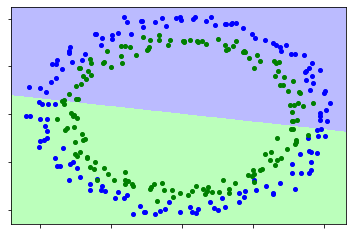

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Generate a mesh over one-dimensional data
# (The mesh() and plot_boundary() functionality were inspired by the
# documentation of the BSD-licensed scikit-learn library.)
def mesh(values):
    range = values.max() - values.min()
    padding_percent = 5
    padding = range * padding_percent * 0.01
    resolution = 1000
    interval = (range + 2 * range * padding) / resolution
    return np.arange(values.min() - padding, values.max() + padding, interval)


def plot_boundary(points, w):
    print("Calculating boundary...")
    # Generate a grid of points over the data
    x_mesh = mesh(points[:, 1])
    y_mesh = mesh(points[:, 2])
    grid_x, grid_y = np.meshgrid(x_mesh, y_mesh)
    grid = np.c_[grid_x.ravel(), grid_y.ravel()]
    # Classify points in the grid
    classifications = classify(prepend_bias(grid), w).reshape(grid_x.shape)
    # Trace the decision boundary
    BLUE_AND_GREEN = ListedColormap(['#BBBBFF', '#BBFFBB'])
    plt.contourf(grid_x, grid_y, classifications, cmap=BLUE_AND_GREEN)

    
def plot_data_by_label(input_variables, labels, label_selector, symbol):
    points = input_variables[(labels == label_selector).flatten()]
    plt.plot(points[:, 1], points[:, 2], symbol, markersize=4)
    

plot_boundary(X_train, w)
plot_data_by_label(X_train, Y_train_unencoded, 0, 'bo')
plot_data_by_label(X_train, Y_train_unencoded, 1, 'go')
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

# Plot Model

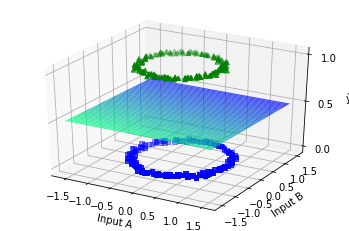

In [12]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Plot the axes
ax = plt.figure().gca(projection="3d")
ax.set_zticks([0, 0.5, 1])
ax.set_xlabel("Input A")
ax.set_ylabel("Input B")
ax.set_zlabel("ŷ")

# Plot the data points
blue_squares = X_train[(Y_train_unencoded == 0).flatten()]
ax.scatter(blue_squares[:, 1], blue_squares[:, 2], 0, c='b', marker='s')
green_triangles = X_train[(Y_train_unencoded == 1).flatten()]
ax.scatter(green_triangles[:, 1], green_triangles[:, 2], 1, c='g', marker='^')

# Plot the model
MARGIN = 0.5
MESH_SIZE = 50
x, y = np.meshgrid(np.linspace(x1.min() - MARGIN, x1.max() + MARGIN, MESH_SIZE),
                   np.linspace(x2.min() - MARGIN, x2.max() + MARGIN, MESH_SIZE))
grid = zip(np.ravel(x), np.ravel(y))
z = np.array([forward(np.column_stack(([1], [i], [j])), w) for i, j in grid])
z = z[:, :, 1].reshape((MESH_SIZE, MESH_SIZE))
ax.plot_surface(x, y, z, alpha=0.75, cmap=cm.winter,
                linewidth=0, antialiased=True)
plt.show()